# **Predicting Game Revenue Using Machine Learning Models**

## **Introduction**

In the dynamic gaming industry, predicting revenue is critical for strategic planning and decision-making. This project aims to leverage historical data to predict future revenue for games based on various factely.

## **Dataset Overview**

The dataset contains the following key columns, each contributing to understanding and predicting game revenue:

- **Date**: Represents the date of the game's release.
- **Platform**: Indicates the gaming platform, such as PC, Console, Mobile, or VR.
- **Daily Active Users (DAU)**: The number of users actively playing the game daily.
- **New Registrations**: The number of new users who registered to play the game.
- **Session Duration (minutes)**: The average time (in minutes) that players spend in a single gaming session.
- **In-game Purchases ($)**: The amount of revenue generated from in-game transactions, such as microtransactions, skins, or DLCs (downloadable content).
- **Social Media Mentions**: The number of times the game is mentioned on social media platforms.
- **Stream Viewership**: The number of viewers watching the game on live-streaming platforms like Twitch, YouTube Gaming, or Facebook Gaming.
- **Revenue ($)**: The total revenue generated by the game from all sources (e.g., sales, in-game purchases, subscriptions).
- **Top Genre**: The genre of the game (e.g., Action, RPG, Strategy, Simulation).
- **Influencer Endorsements**: A binary indicator (0 or 1) showing whether the game has been endorsed or promoted by influencers or streamers.

Additionally, **GMM Clusters** were created for unsupervised modeling to group similar games based on their attributes.

## **Goal of the Project**

The primary goal of this project is to **predict future game revenue** using the available data. By analyzing historical trends and patterns in the dataset, the project seeks to develop robust machine learning models that can accurately forecast revenue.

## **Approach**

To achieve this goal, the following steps were undertaken:

1. **Data Preprocessing**:
   - Cleaning and transforming the dataset.
   - Encoding categorical features such as "Platform" and "Top Genre".
   - Feature scaling and selecting important predictors for the models.

2. **Unsupervised Learning**:
   - Implementing Gaussian Mixture Models (GMM) to create clusters of games with similar attributes.

3. **Supervised Learning Models**:
   - Building and training two predictive models:
     - **Random Forest**: A robust ensemble-based decision tree model for regression.
     - **Neural Network**: A deep learning-based model to capture complex relationships in the data.

4. **Model Evaluation**:
   - Comparing the performance of both models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.
   - Analyzing residual plots, feature importance, and predicted vs. actual comparisons to draw insights.

This comprehensive approach provides a deeper understanding of the factors influencing game revenue and helps identify the most effective predictive strategy.
d determine which modeling approach is more effective for revenue prediction.


## **Libraries Used in the Project**

The project utilizes a variety of Python libraries to perform data preprocessing, modeling, visualization, and evaluation. Below is an overview of the key libraries and their purposes:

### **Data Manipulation and Analysis**
- **`pandas`**: Used for handling and manipulating tabular data. Provides tools for data cleaning, merging, and analysis.
- **`numpy`**: A powerful library for numerical computations and array manipulations.

### **Data Visualization**
- **`matplotlib.pyplot`**: A versatile library for creating static, animated, and interactive visualizations.
- **`seaborn`**: Built on top of Matplotlib, it provides an easier way to create visually appealing statistical plots.

### **Data Preprocessing**
- **`sklearn.preprocessing.StandardScaler`**: Scales numerical features to have zero mean and unit variance, improving model performance.
- **`sklearn.preprocessing.OneHotEncoder`**: Encodes categorical features as numerical arrays for machine learning compatibility.
- **`sklearn.compose.ColumnTransformer`**: Facilitates the preprocessing of different types of data (e.g., numerical and categorical) within a single pipeline.

### **Dimensionality Reduction and Clustering**
- **`sklearn.decomposition.PCA`**: Performs Principal Component Analysis to reduce the dimensionality of the data while retaining the most important information.
- **`sklearn.mixture.GaussianMixture`**: Fits a Gaussian Mixture Model (GMM) for clustering tasks.
- **`sklearn.manifold.TSNE`**: Reduces dimensionality for visualization purposes, preserving the relationships between points in high-dimensional space.
- **`sklearn.metrics.silhouette_score`**: Calculates the silhouette score to evaluate the quality of clustering.

### **Model Development and Evaluation**
- **`sklearn.ensemble.RandomForestRegressor`**: A robust ensemble-based model used for regression tasks.
- **`sklearn.ensemble.GradientBoostingRegressor`**: An ensemble technique that combines decision trees for regression tasks.
- **`tensorflow.keras.models.Sequential`**: Used to create neural network models with a simple, sequential architecture.
- **`tensorflow.keras.layers.Dense`**: Fully connected layers in the neural network.
- **`tensorflow.keras.layers.Dropout`**: Regularization to prevent overfitting in neural networks.
- **`sklearn.model_selection.train_test_split`**: Splits the dataset into training and testing sets for model evaluation.
- **`sklearn.model_selection.GridSearchCV`**: Performs hyperparameter tuning to find the best combination of parameters for the models.

### **Model Performance Metrics**
- **`sklearn.metrics.mean_squared_error`**: Measures the average squared difference between predicted and actual values.
- **`sklearn.metrics.mean_absolute_error`**: Calculates the average magnitude of errors in predictions.
- **`sklearn.metrics.r2_score`**: Evaluates the proportion of variance explained by the model, providing a measure of goodness-of-fit.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

## **Data Exploration and Preprocessing**

In this section, we perform initial data exploration and preprocessing to prepare the dataset for further analysis and modeling. Below is a description of the steps:

### **1. Setting Seaborn Style**
- **`sns.set(style='whitegrid')`**: Configures Seaborn's visual style to "whitegrid," making the plots more visually appealing and easy to interpret.

### **2. Loading the Dataset**
- **`pd.read_csv('Gaming-Trends-2024-UTF.csv')`**: Loads the gaming dataset into a Pandas DataFrame, which will be used for exploration and preprocessing.

### **3. Data Exploration**
- **`gaming_df.info()`**: Displays a summary of the dataset, including column names, non-null counts, and data types.
- **`gaming_df.describe()`**: Provides descriptive statistics (e.g., mean, standard deviation, min, max) for numerical features in the dataset, offering insights into the data distribution.

### **4. One-Hot Encoding for Categorical Features**
- **`pd.get_dummies(...)`**: Converts categorical columns (`Top Genre` and `Platform`) into numerical dummy variables. This step makes these features suitable for machine learning models by creating binary indicators for each category.
  - **`drop_first=True`**: Avoids multicollinearity by dropping one category from each set of dummy variables.

### **5. Identifying Numerical Features for Standardization**
- A list of numerical features is created to standardize their values for consistency:
  - `Daily Active Users (DAU)`
  - `New Registrations`
  - `Session Duration (minutes)`
  - `In-game Purchases ($)`
  - `Social Media Mentions`
  - `Stream Viewership`

### **6. Standardizing Numerical Features**
- **`StandardScaler()`**: Standardizes numerical features by transforming them to have a mean of 0 and a standard deviation of 1. This ensures all numerical features are on the same scale, improving the performance of distance-based models and neural networks.
- **`scaler.fit_transform(...)`**: Applies standardization to the specified numerical features in the DataFrame.

This preprocessing step ensures the dataset is clean, consistent, and ready for analysis and model development.


In [94]:
sns.set(style='whitegrid')

# load dataset
gaming_df = pd.read_csv('Gaming-Trends-2024-UTF.csv')

# data exploration
print(gaming_df.info())
print(gaming_df.describe())

# one hot encoding for top genre and platform
gaming_encoded_df = pd.get_dummies(gaming_df, columns=['Top Genre', 'Platform'], drop_first=True)

# numerical features to be standardized
numerical_feats = [
    'Daily Active Users (DAU)', 
    'New Registrations', 
    'Session Duration (minutes)', 
    'In-game Purchases ($)', 
    'Social Media Mentions', 
    'Stream Viewership']

# standardize numerical features
scaler = StandardScaler()
gaming_encoded_df[numerical_feats] = scaler.fit_transform(gaming_encoded_df[numerical_feats])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4989 non-null   object 
 1   Platform                    4989 non-null   object 
 2   Daily Active Users (DAU)    4989 non-null   int64  
 3   New Registrations           4989 non-null   int64  
 4   Session Duration (minutes)  4989 non-null   float64
 5   In-game Purchases ($)       4989 non-null   float64
 6   Social Media Mentions       4989 non-null   int64  
 7   Stream Viewership           4989 non-null   float64
 8   Revenue ($)                 4989 non-null   float64
 9   Top Genre                   4989 non-null   object 
 10  Influencer Endorsements     4989 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 428.9+ KB
None
       Daily Active Users (DAU)  New Registrations  \
count               4989.0000

## **Dimensionality Reduction Using PCA**
---

### **Code Explanation**
1. **Principal Component Analysis (PCA)**:
   - **`PCA(n_components=0.95)`**: Initializes the PCA model to retain 95% of the variance in the data.
   - **`pca.fit_transform(...)`**: Applies PCA to the dataset after dropping irrelevant columns (`'Revenue ($)'` and `'Date'`) to compute the principal components. The transformed data is stored in `principal_components`.

2. **Explained Variance Ratio**:
   - **`pca.explained_variance_ratio_`**: Retrieves the proportion of variance explained by each principal component. This provides insights into the contribution of each component to the total variance in the data.
   - The explained variance values are printed for interpretation:
     ```
     Explained variance by components: 
     [0.26828623, 0.14080143, 0.13663772, 0.12639237, 0.12175891, 0.0484508,
      0.03340572, 0.03280217, 0.02634864, 0.02590002]
     ```

3. **Variance Explained Plot**:
   - **`plt.plot(...)`**: Plots the cumulative explained variance against the number of principal components to help determine the number of components needed to retain the desired amount of variance (95% in this case).

---

### **Output Explanation**
- **Explained Variance**:
  - The individual explained variance values show how much variance each principal component captures. For example, the first component explains ~26.8% of the variance, the second explains ~14.1%, and so on.

- **Cumulative Explained Variance Plot**:
  - The plot shows the cumulative explained variance as additional components are included. This helps visualize how many components are required to reach the desired variance threshold.
  - In this case, approximately 8–9 components are sufficient to retain over 95% of the total variance in the dataset.

---

### **Key Insight**
PCA has successfully reduced the dimensionality of the dataset by identifying the most important features while preserving 95% of the data's variance. This prepares the data for efficient modeling with reduced redundancy.


Explained variance by components: [0.26828623 0.14080143 0.13663772 0.12639237 0.12175891 0.0484508
 0.03340572 0.03280217 0.02634864 0.02590002]


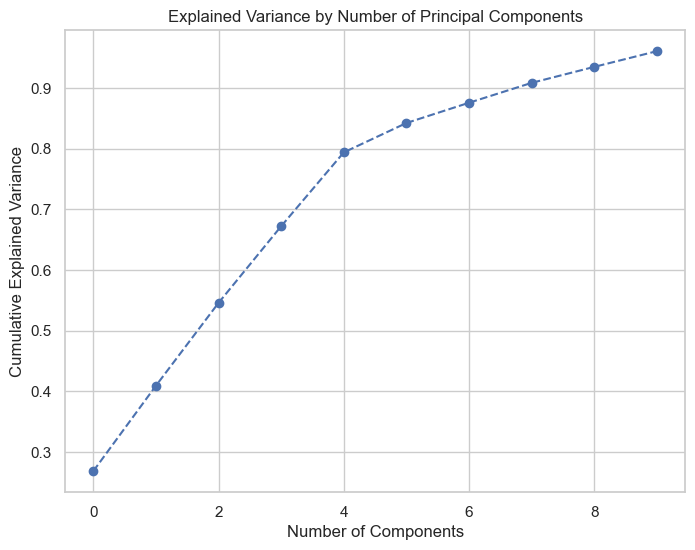

In [82]:
# apply pca to reduce dimensions
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(gaming_encoded_df.drop(columns=['Revenue ($)', 'Date']))

# check the cariance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance by components: {explained_variance_ratio}')

# plot explained variance to determine number of components
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### **Gaussian Mixture Model (GMM) Clustering**

The following code implements **Gaussian Mixture Model (GMM)** clustering to segment games based on their features. Here's a detailed breakdown of the process:

1. **GMM Clustering**:
   - The **Gaussian Mixture Model (GMM)** is applied to the transformed features obtained from **Principal Component Analysis (PCA)**.
   - The number of clusters is set to **3**, representing three distinct groups of  I found that 3 was better than the predicted 6 or 7 clusters for consistency.games.
   - Each game is assigned a **GMM Cluster** (0, 1, or 2), and this cluster label is added as a new column, `GMM_Cluster`, in the original dataset.

2. **Cluster Characteristics**:
   - The **mean values of numeric features** are calculated for each cluster. This provides insights into the key characteristics of games grouped into each cluster.

3. **Visualizing Cluster Distribution**:
   - A **bar chart** is created to show the count of games in each cluster, providing a clear view of how the dataset is distributed across clusters.

4. **Feature Analysis Across Clusters**:
   - **Boxplots** are generated to examine the variation of key features such as:
     - Daily Active Users (DAU)
     - New Registrations
     - Session Duration (minutes)
     - In-game Purchases ($)
     - Stream Viewership
     - Social Media Mentions
   - These plots reveal the spread, central tendencies, and potential outliers of these features within each cluster.

5. **Genre and Platform Distribution**:
   - Additional bar charts visualize the **distribution of game genres and platforms** across the GMM clusters. This helps in understanding how categorical variables are grouped within each cluster.

---

### **Outputs**

1. **Cluster Characteristics Table**:
   - The table summarizes the **average feature values** for each cluster. For instance:
     - **Cluster 0**: Higher **Daily Active Users** and **Social Media Mentions**, but moderate revenue.
     - **Cluster 1**: Longer **Session Duration** and higher **Influencer Endorsements**.
     - **Cluster 2**: Highest **Stream Viewership**, suggesting games with a strong streaming presence.

2. **Cluster Distribution Bar Chart**:
   - This bar chart shows the **number of games in each cluster**, indicating a relatively balanced distribution of games across the three clusters.

3. **Boxplots (Feature Distributions)**:
   - These plots highlight how key features vary across the clusters:
     - **Cluster 1**: Narrower range for Daily Active Users but higher values for Session Duration.
     - **Cluster 2**: Highest median Stream Viewership, indicating popularity among streamed games.

4. **Genre and Platform Distribution**:
   - These charts visualize the distribution of game genres and platforms within each cluster, offering insights into the categorical composition of each group.

---

### **Interpretation**

- **Cluster 0**: Represents games with a large user base but moderate engagement metrics like in-game purchases and revenue.
- **Cluster 1**: Focuses on games with higher session durations and influencer endorsements, suggesting strong player engagement.
- **Cluster 2**: Features games with the highest stream viewership, indicating a focus on games that excel in streaming platforms.

These insights can help in tailoring revenue prediction strategies and better understanding the segmentation of games within the dataset.
nt modeling with reduced redundancy.


Cluster Characteristics (Average Feature Values):
             Daily Active Users (DAU)  New Registrations  \
GMM_Cluster                                                
0                       137925.404788       13792.079065   
1                        50861.620669        5085.712860   
2                       147518.868456       14751.428859   

             Session Duration (minutes)  In-game Purchases ($)  \
GMM_Cluster                                                      
0                             56.193364           47559.143143   
1                             62.016287           58496.265682   
2                             56.756911           50194.989537   

             Social Media Mentions  Stream Viewership   Revenue ($)  \
GMM_Cluster                                                           
0                      5663.316815       41866.723823  66052.365279   
1                      5445.509689       61869.123057  77658.959431   
2                      6126.519463

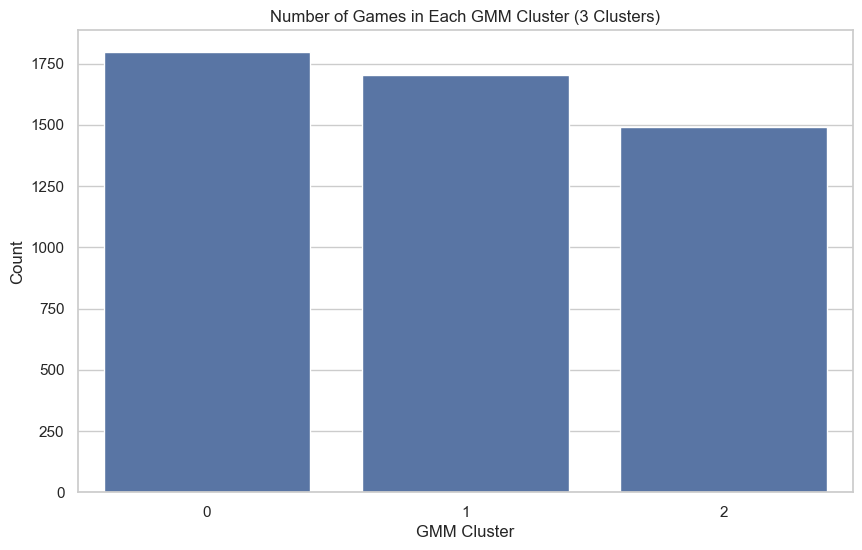

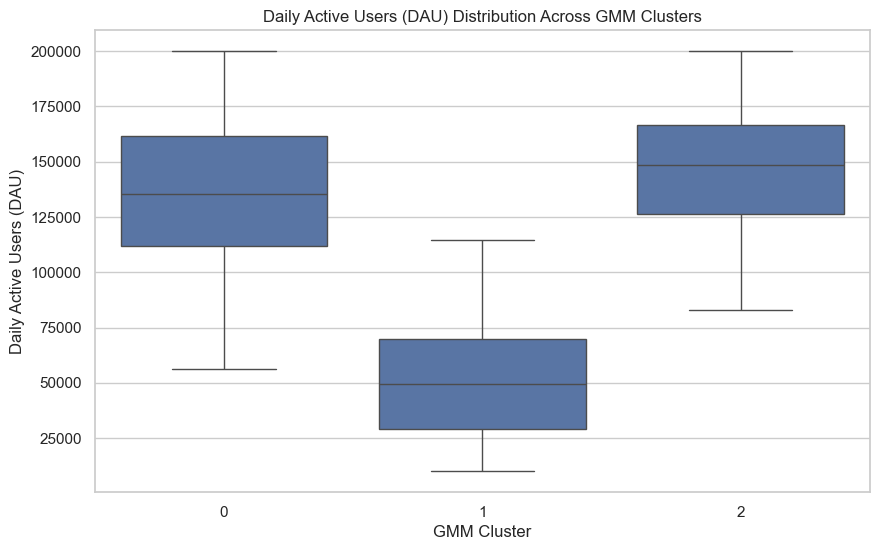

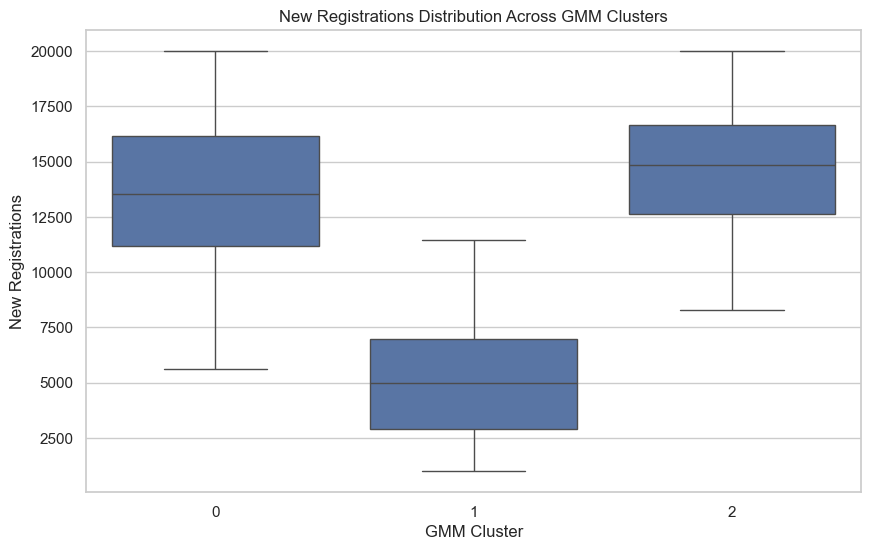

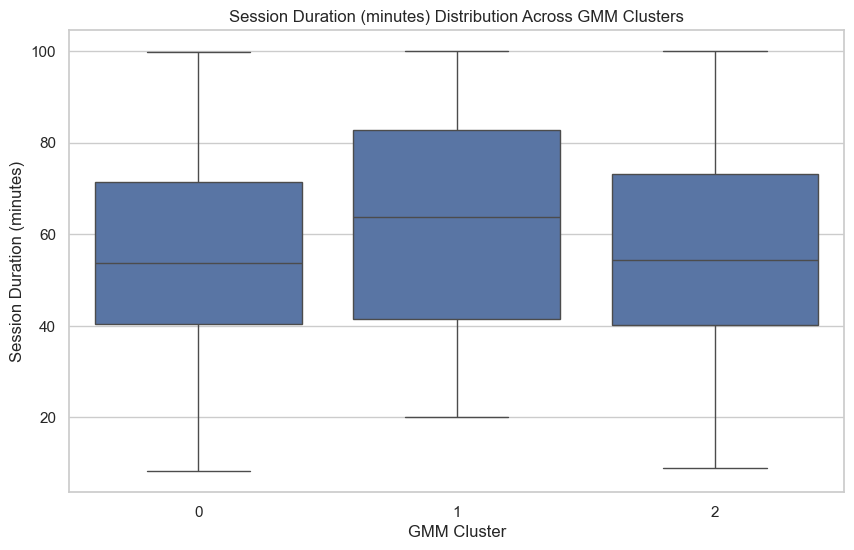

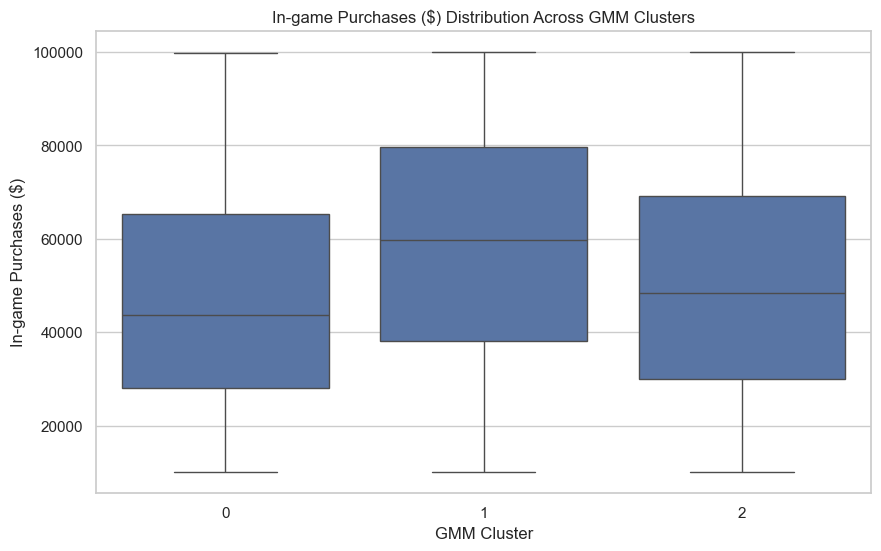

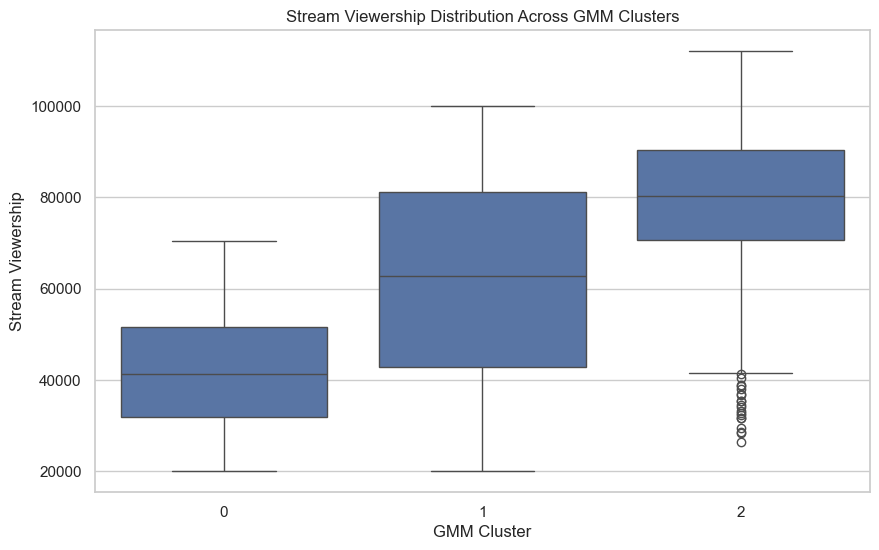

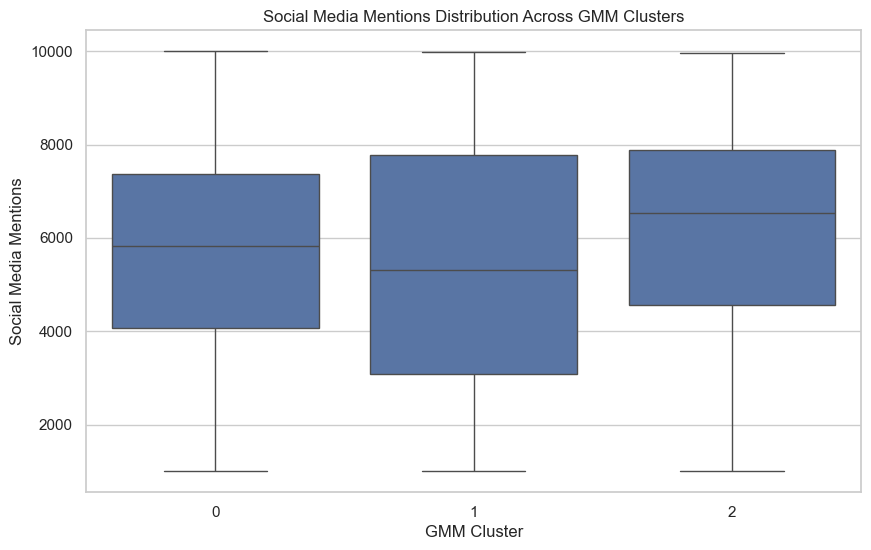

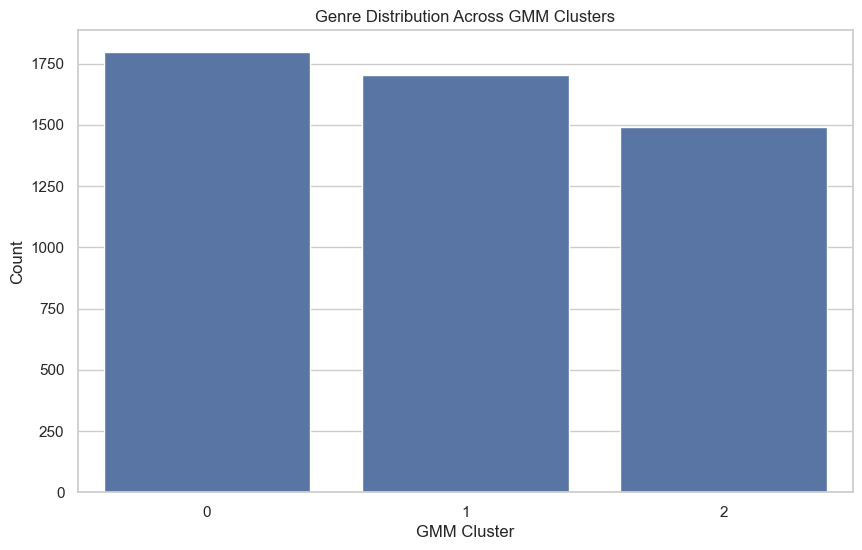

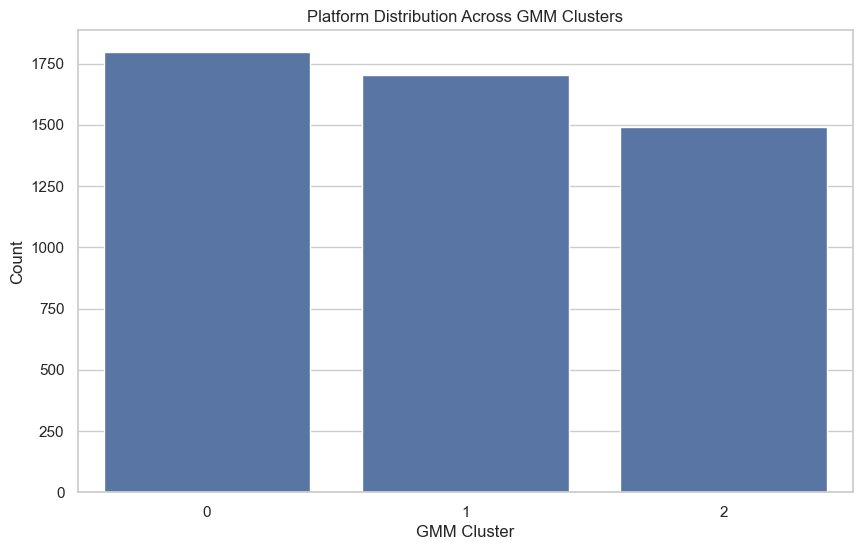

In [97]:
# apply gaussian mixture model (gmm) on the principal components
optimal_components = 3
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_clusters = gmm.fit_predict(principal_components)

# add the gmm clusters to original dataframe for analysis
gaming_df['GMM_Cluster'] = gmm_clusters

# calculate average of each feature in each cluster
numeric_feats = gaming_df.select_dtypes(include=['number']).columns
cluster_chars = gaming_df.groupby('GMM_Cluster')[numeric_feats].mean()
print('Cluster Characteristics (Average Feature Values):')
print(cluster_chars)

# visualize the number of games in each cluster after applying gmm
plt.figure(figsize=(10,6))
sns.countplot(x='GMM_Cluster', data=gaming_df)
plt.title('Number of Games in Each GMM Cluster (3 Clusters)')
plt.xlabel('GMM Cluster')
plt.ylabel('Count')
plt.show()

feats_to_plot = ['Daily Active Users (DAU)',
                 'New Registrations',
                 'Session Duration (minutes)',
                 'In-game Purchases ($)',
                 'Stream Viewership',
                 'Social Media Mentions']

for feature in feats_to_plot:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='GMM_Cluster', y=feature, data=gaming_df)
    plt.title(f'{feature} Distribution Across GMM Clusters')
    plt.xlabel('GMM Cluster')
    plt.ylabel(feature)
    plt.show()

# visualize the distribution of genre across clusters
plt.figure(figsize=(10,6))
sns.countplot(x='GMM_Cluster', data=gaming_df)
plt.title('Genre Distribution Across GMM Clusters')
plt.xlabel('GMM Cluster')
plt.ylabel('Count')
#plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# visualize the distribution of platform across clusters
plt.figure(figsize=(10,6))
sns.countplot(x='GMM_Cluster', data=gaming_df)
plt.title('Platform Distribution Across GMM Clusters')
plt.xlabel('GMM Cluster')
plt.ylabel('Count')
#plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Data Preprocessing and Feature Transformation**

This code block focuses on preparing the data for modeling by addressing column formatting, handling categorical features, and applying dimensionality reduction through **Principal Component Analysis (PCA)**.

---

### **Key Steps and Actions**

1. **Column Name Standardization**:
   - The `gaming_df.columns` are printed to check for proper formatting.
   - Leading and trailing spaces in column names are removed using `str.strip()`.

2. **Date Column Handling**:
   - The **'Date'** column is converted to a datetime format using `pd.to_datetime()`. Any invalid dates are coerced to `NaT`.
   - The **'Date'** column is dropped after extracting useful features:
     - `year`: Extracted year of the game's release.
     - `month`: Extracted month of the game's release.

3. **Categorical Features**:
   - The categorical columns (`Top Genre` and `Platform`) are processed:
     - Missing values are filled with `'Unknown'`.
     - Columns are converted to strings to ensure compatibility with encoding.

4. **One-Hot Encoding**:
   - **One-hot encoding** is applied to the categorical features (`Top Genre` and `Platform`) using `ColumnTransformer` and `OneHotEncoder`.
   - The encoded features are added to the dataset alongside the numerical features.

5. **Handling Missing and Non-Numeric Data**:
   - After encoding, the dataset is checked for non-numeric data types.
   - Any non-numeric values are coerced to numeric using `pd.to_numeric`, and any resulting NaN values are filled with 0.

6. **Dimensionality Reduction with PCA**:
   - **Principal Component Analysis (PCA)** is applied to reduce the dimensions of the dataset while retaining 95% of the explained variance.
   - The number of principal components is set to the optimal value (determined earlier).
   - The resulting shape of the **principal components** is printed, confirming the reduction to 3 dimensions.

---

### **Outputs and Interpretations**

1. **Column Names**:
   - The column names are confirmed to include features such as `Date`, `Platform`, `Daily Active Users (DAU)`, `Revenue ($)`, and `Top Genre`.

2. **Encoded Features**:
   - After one-hot encoding, the categorical features (`Top Genre` and `Platform`) are converted into binary indicator columns, such as:
     - `cat__Top Genre_Action`, `cat__Top Genre_Adventure`
     - `cat__Platform_PC`, `cat__Platform_Console`
   - These are merged with numerical features like `Daily Active Users (DAU)` and `Revenue ($)`.

3. **Data Types**:
   - All columns are confirmed to be numeric (`float64`) after preprocessing.

4. **Principal Components**:
   - The **principal components shape** is `(4989, 3)`, indicating that the dataset has been reduced to 3 key dimensions, facilitating computational efficiency and visualization while retaining most of the variance.

---

### **Significance**

- This preprocessing pipeline ensures that the data is clean, consistent, and prepared for modeling.
- The combination of **one-hot encoding** and **PCA** allows for an efficient representation of both categorical and numerical features in a reduced feature space.
- The dataset is now ready for clustering or supervised modeling using the transformed principal components.


In [114]:
# print columns to check their names
print("Column names:", gaming_df.columns)

# ensure there are no leading/trailing spaces in column names
gaming_df.columns = gaming_df.columns.str.strip()

# properly handle the 'Date' column
if 'Date' in gaming_df.columns:
    gaming_df['Date'] = pd.to_datetime(gaming_df['Date'], errors='coerce')
    # Drop the original date column and extract useful features
    gaming_df['year'] = gaming_df['Date'].dt.year
    gaming_df['month'] = gaming_df['Date'].dt.month
    gaming_df = gaming_df.drop(columns=['Date'])
else:
    print("'Date' column not found in the DataFrame")

# define categorical features
categorical_feats = ['Top Genre', 'Platform']

# ensure the categorical columns exist and handle missing values
for cat in categorical_feats:
    if cat in gaming_df.columns:
        gaming_df[cat] = gaming_df[cat].fillna('Unknown').astype(str)
    else:
        print(f"'{cat}' column not found in the DataFrame")

# apply one hot encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_feats)
    ],
    remainder='passthrough'
)

# fit and transform using the column transformer
gaming_df_encoded = column_transformer.fit_transform(gaming_df)

# convert the output to dataframe
feat_names = column_transformer.get_feature_names_out()
gaming_df_encoded = pd.DataFrame(gaming_df_encoded, columns=feat_names)

# check for any non-numeric data
print("Data types after encoding:")
print(gaming_df_encoded.dtypes)

# convert everything to numeric
gaming_df_encoded = gaming_df_encoded.apply(pd.to_numeric, errors='coerce')

# handle any remaining NaN values after encoding
gaming_df_encoded = gaming_df_encoded.fillna(0)

# apply pca
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(gaming_df_encoded)

print('Principal Components Shape:', principal_components.shape)

Column names: Index(['Platform', 'Daily Active Users (DAU)', 'New Registrations',
       'Session Duration (minutes)', 'In-game Purchases ($)',
       'Social Media Mentions', 'Stream Viewership', 'Revenue ($)',
       'Top Genre', 'Influencer Endorsements', 'GMM_Cluster', 'year', 'month'],
      dtype='object')
'Date' column not found in the DataFrame
Data types after encoding:
cat__Top Genre_Action                    float64
cat__Top Genre_Adventure                 float64
cat__Top Genre_FPS                       float64
cat__Top Genre_RPG                       float64
cat__Top Genre_Simulation                float64
cat__Platform_Console                    float64
cat__Platform_Mobile                     float64
cat__Platform_PC                         float64
cat__Platform_VR                         float64
remainder__Daily Active Users (DAU)      float64
remainder__New Registrations             float64
remainder__Session Duration (minutes)    float64
remainder__In-game Purchases (

## PCA Visualization and Explained Variance Analysis

### Code Overview
This code performs and visualizes a **Principal Component Analysis (PCA)** on the preprocessed dataset. PCA is a dimensionality reduction technique used to transform high-dimensional data into fewer dimensions while retaining as much variance as possible. Below are the key steps:

1. **Visualization of Principal Components**: 
   - A scatter plot is generated to visualize the first two principal components.
   - This provides insight into how the data is distributed in the reduced dimensional space.

2. **Explained Variance Ratio**:
   - The variance explained by each principal component is printed.
   - This explains how much information (variance) each principal component captures.

3. **Cumulative Explained Variance Plot**:
   - A line plot is generated to show the cumulative explained variance as the number of components increases.
   - This helps in selecting the optimal number of components required to capture a sufficient amount of variance.

### Output

#### Scatter Plot:
The scatter plot visualizes the data in the 2D space formed by the first two principal components. Each point represents a sample in the reduced-dimensional space. This allows us to visually assess patterns, clusters, or separability in the data.

#### Explained Variance Ratio:
The explained variance ratio indicates the proportion of variance retained by each principal component:
- **Principal Component 1**: 48.66% of the variance.
- **Principal Component 2**: 31.33% of the variance.
- **Principal Component 3**: 10.77% of the variance.

#### Cumulative Explained Variance Plot:
The cumulative explained variance plot shows that:
- The first component retains nearly 49% of the variance.
- Adding the second component increases this to around 80%.
- With the third component, over 90% of the variance is captured.

### Significance
The PCA analysis confirms that reducing the data to 3 principal components retains over 90% of the variance, making it an effective representation of the original dataset. The scatter plot provides a visual representation of how the data is distributed in the reduced-dimensional space, offering potential insights into the underlying structure or clustering of the data.


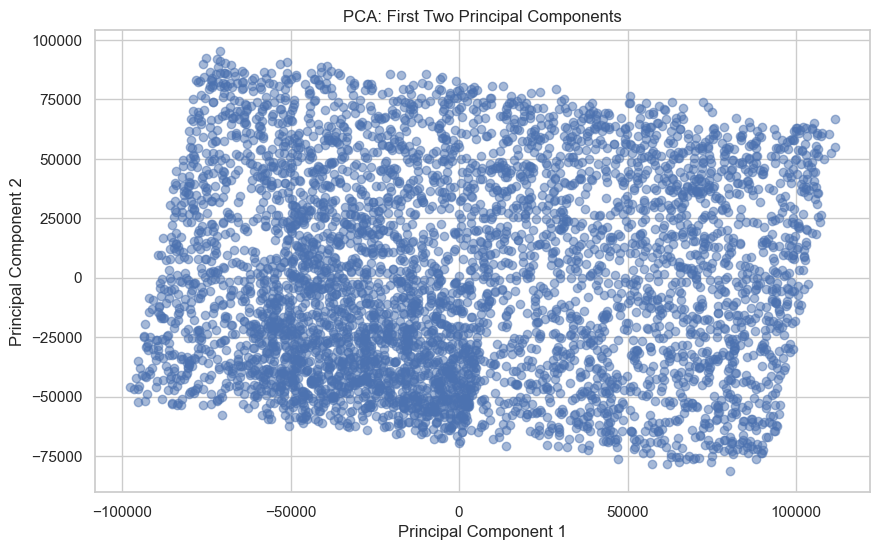

Explained Variance Ratio: [0.4866499  0.31332042 0.10768836]


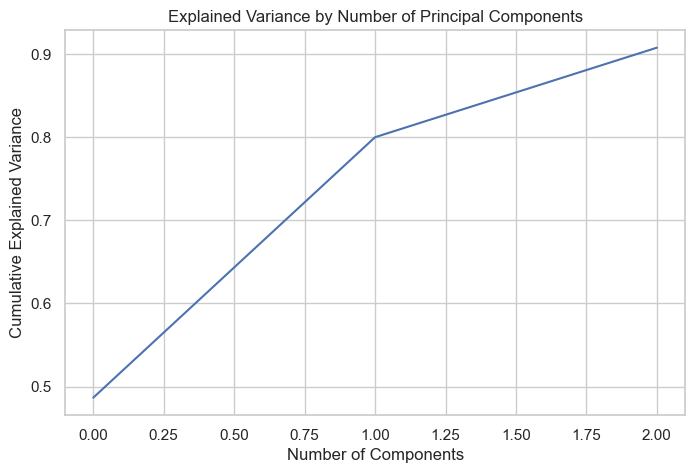

In [116]:
# visualize first 2 principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.show()

# variance retained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# vizualize explained variance by each component
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

## PCA Components Analysis

### Code Overview
This code scales the encoded dataset and applies **Principal Component Analysis (PCA)** to further analyze the contribution of each feature to the principal components. The key steps include:

1. **Data Scaling**:
   - The dataset is standardized using `StandardScaler` to ensure all features contribute equally to the PCA analysis.

2. **PCA Transformation**:
   - PCA is applied to the scaled dataset to reduce dimensionality while retaining most of the variance.

3. **Principal Component Contributions**:
   - The contributions (weights) of each feature to the first three principal components are calculated and stored in a DataFrame.

4. **Output of Principal Components**:
   - Each column corresponds to a feature, and each row represents a principal component (PC1, PC2, PC3).
   - The values represent the contribution (or loading) of each feature to that specific principal component.

### Output Description

#### Principal Component Weights:
- **PC1** (Principal Component 1):
  - Strong negative contributions from `remainder__Daily Active Users (DAU)` and `remainder__New Registrations` (-0.640644), indicating these features dominate the first component.
  - Positive contributions from `remainder__Revenue ($)` (0.148002) and `remainder__In-game Purchases ($)` (0.123931), suggesting these features also influence PC1 positively.

- **PC2** (Principal Component 2):
  - High positive contribution from `remainder__Stream Viewership` (0.654674) and `remainder__GMM_Cluster` (0.685929).
  - Moderate contributions from `remainder__In-game Purchases ($)` (0.161163) and `remainder__Influencer Endorsements` (0.201161).

- **PC3** (Principal Component 3):
  - Strong positive contribution from `cat__Platform_PC` (0.606515), indicating platform-related variance is captured in PC3.
  - Negative contributions from `remainder__Revenue ($)` (-0.258757) and `cat__Platform_Console` (-0.340773).

#### Observations:
- **Feature Dominance**:
  - PC1 is heavily influenced by numerical features like active users and revenue-related metrics.
  - PC2 captures social media mentions, stream viewership, and clustering effects.
  - PC3 highlights platform-specific variances and revenue dynamics.

- **Dimensionality Reduction**:
  - By focusing on these principal components, the dataset's complexity is reduced, yet critical information about feature relationships is preserved.

### Significance
Understanding the weights for each principal component helps interpret how features contribute to the reduced dimensions. This analysis informs feature importance and relationships, guiding downstream tasks such as clustering or regression.


In [118]:
# standardize encoded df for pca
scaler = StandardScaler()
gaming_df_encoded_scaled = scaler.fit_transform(gaming_df_encoded)
principal_components = pca.fit_transform(gaming_df_encoded_scaled)

# retrieve principal comonent loading from pca analysis
pca_components = pd.DataFrame(pca.components_, columns=feat_names, index=['PC1', 'PC2', 'PC3'])
print(pca_components)

     cat__Top Genre_Action  cat__Top Genre_Adventure  cat__Top Genre_FPS  \
PC1              -0.008570                  0.003144           -0.029074   
PC2               0.016539                 -0.010370           -0.013337   
PC3              -0.097926                  0.216449           -0.061386   

     cat__Top Genre_RPG  cat__Top Genre_Simulation  cat__Platform_Console  \
PC1            0.036881                  -0.002354               0.002305   
PC2           -0.013238                   0.019982               0.037517   
PC3            0.045642                  -0.098291              -0.205784   

     cat__Platform_Mobile  cat__Platform_PC  cat__Platform_VR  \
PC1              0.007926          0.010553         -0.020620   
PC2             -0.016311         -0.017802         -0.003421   
PC3             -0.170297          0.717097         -0.340709   

     remainder__Daily Active Users (DAU)  remainder__New Registrations  \
PC1                            -0.640695           

### PCA Visualization and Insights

#### **Code Description:**
The code visualizes the results of Principal Component Analysis (PCA) using different types of plots to understand the contribution of features and relationships between the principal components.

1. **Biplot for Principal Components:**
   - **Scatter Plot:** Displays the scores (data points) for the first two principal components (PC1 and PC2).
   - **Arrows:** Indicate the loadings (contributions) of original features to the principal components. The direction and length of arrows show the importance and correlation of features with the components.
   - **Text Labels:** Feature names are added at the end of arrows for clear interpretation.

2. **Pair Plot of Principal Components:**
   - Visualizes the relationships between the first three principal components (PC1, PC2, and PC3).
   - Diagonal plots represent the distribution of each component, while off-diagonal scatter plots show correlations.

3. **Heatmap of PCA Loadings:**
   - Represents the contributions of each feature to the principal components in a heatmap.
   - Color intensity indicates the magnitude and direction of loadings (positive or negative).

#### **Outputs and Interpretations:**

1. **Biplot for PCA:**
   - Features like `remainder__Daily Active Users (DAU)` and `remainder__New Registrations` have strong contributions to PC1, as evidenced by the long arrows pointing in the same direction.
   - `remainder__Stream Viewership` strongly contributes to PC2, highlighting its distinct role in separating data.

2. **Pair Plot of Principal Components:**
   - Shows the distributions and relationships among PC1, PC2, and PC3.
   - The density curves in the diagonal plots indicate the spread of data along each component.

3. **Heatmap of PCA Loadings:**
   - Features with high absolute values in PC1 include `remainder__Daily Active Users (DAU)` and `remainder__New Registrations`, showing their dominance in the first component.
   - PC2 highlights `remainder__Stream Viewership` and `remainder__GMM_Cluster` as major contributors.
   - PC3 has notable contributions from `cat__Platform_PC` and `remainder__year`, which add unique variance to this component.

#### **Purpose:**
- These visualizations help to:
  - Understand how features influence each principal component.
  - Explore relationships between data points in the reduced-dimensional space.
  - Identify dominant features for data-driven decision-making.


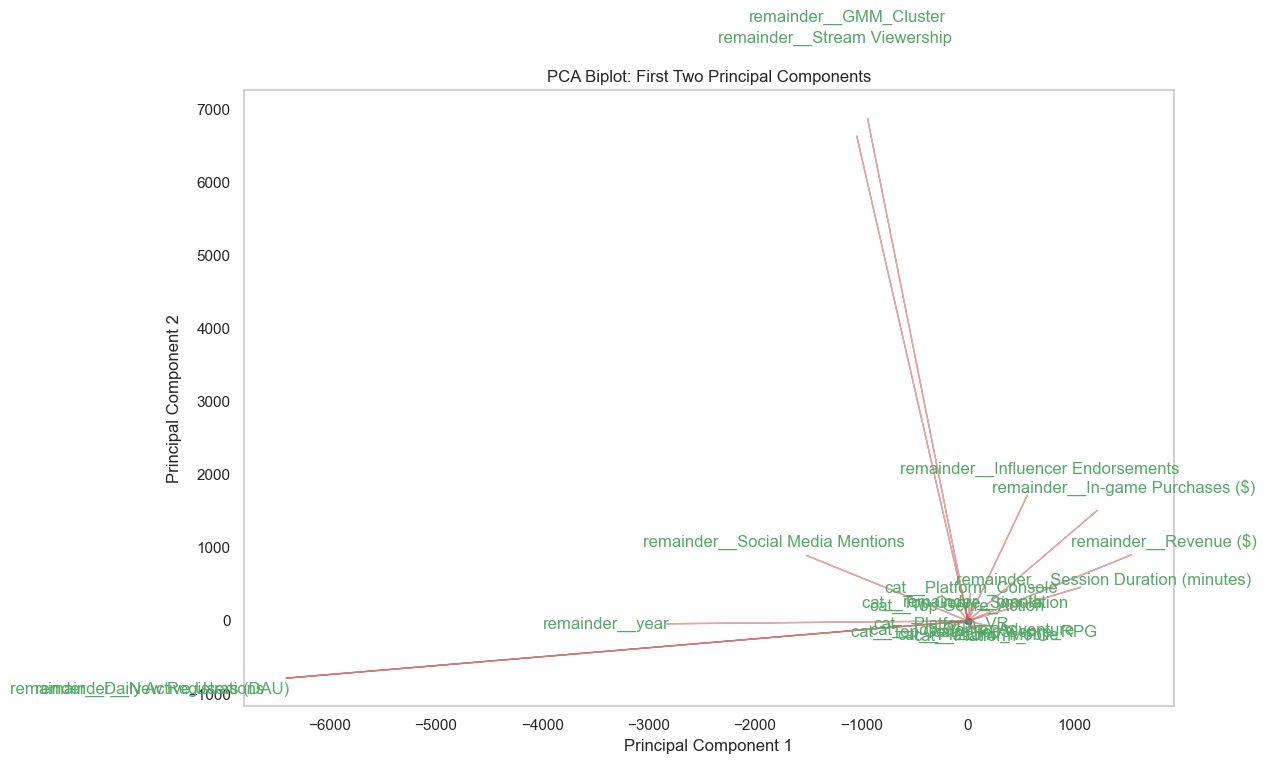

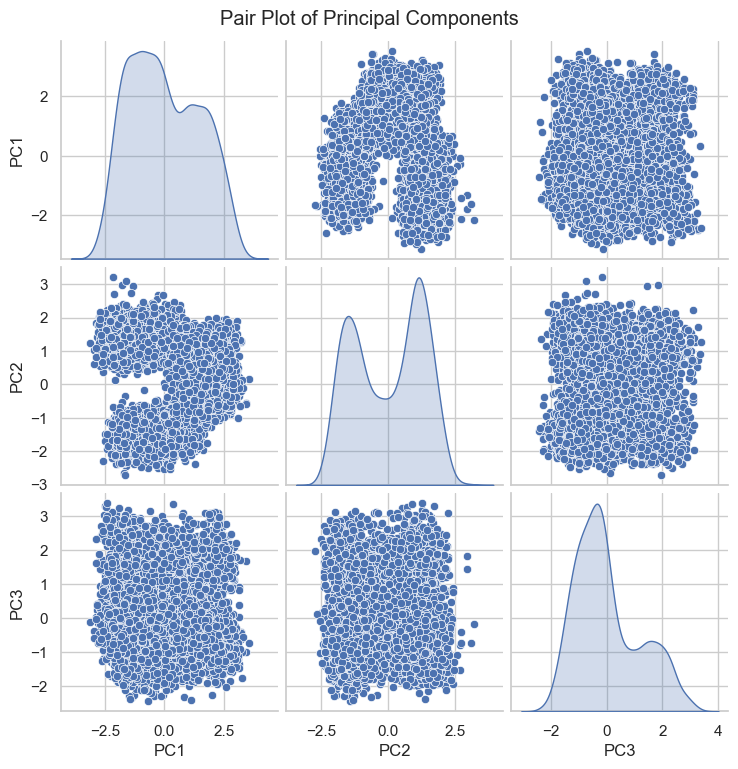

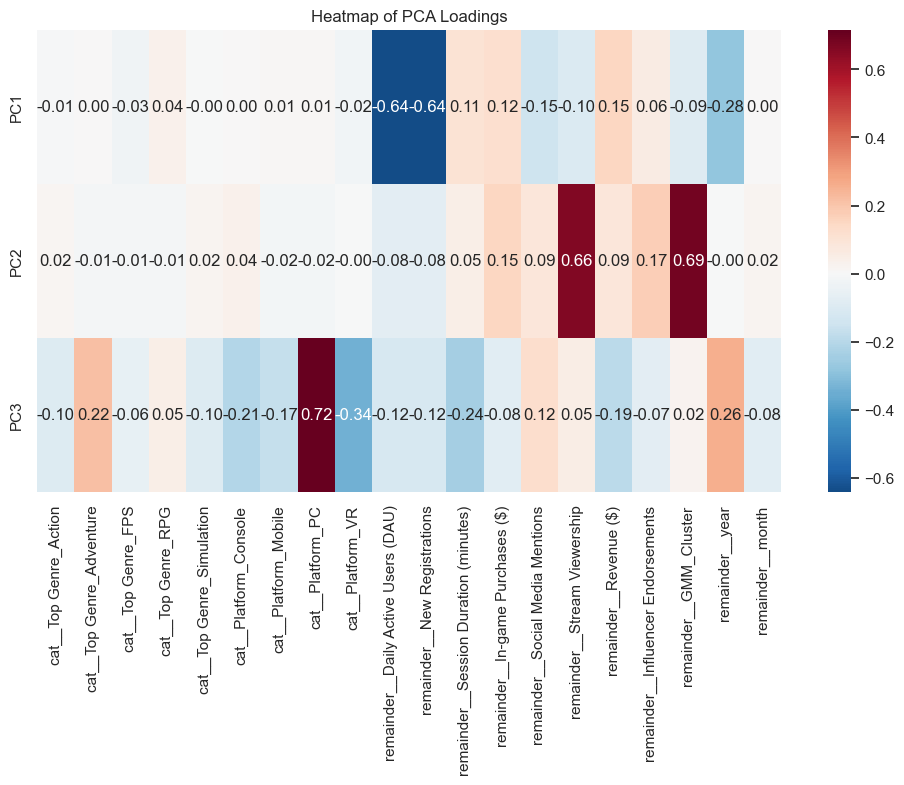

In [120]:
# biplot for first two principal components
plt.figure(figsize=(12, 8))

# plot the scores (data points)
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.6, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot: First Two Principal Components')

# plot the loadings (feature contributions)
for i, feature in enumerate(feat_names):
    plt.arrow(0, 0, pca.components_[0, i] * 10000, pca.components_[1, i] * 10000,
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 12000, pca.components_[1, i] * 12000,
             feature, color='g', ha='center', va='center')

plt.grid()
plt.show()

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# plot a pair plot for the first few components
sns.pairplot(pca_df, diag_kind='kde')
plt.suptitle("Pair Plot of Principal Components", y=1.02)
plt.show()

# create a dataframe of pca loadings
loadings_df = pd.DataFrame(pca.components_, columns=feat_names, index=['PC1', 'PC2', 'PC3'])

# plot a heatmap of pca loadings
plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Heatmap of PCA Loadings')
plt.show()

### PCA and GMM Clustering Analysis

#### Code Description:

1. **PCA and GMM Clustering**:
   - **PCA Transformation**: Principal Component Analysis (PCA) reduces the dimensionality of the `gaming_df_encoded` data to three components (`optimal_components=3`).
   - **Gaussian Mixture Model (GMM)**: The PCA-transformed data is clustered into three groups using the GMM, which assigns soft probabilities for each data point's cluster membership.

2. **Cluster Probabilities**:
   - The GMM assigns probabilities that each data point belongs to a specific cluster. For example, `[0.91, 0.0016, 0.085]` indicates a 91% probability for Cluster 0, 0.16% for Cluster 1, and 8.5% for Cluster 2.

3. **Radar Chart Visualization**:
   - The radar charts illustrate feature profiles for each cluster using average values across selected features (`Daily Active Users`, `New Registrations`, `Stream Viewership`, etc.).
   - Each chart highlights the feature importance and scale across clusters.

4. **Silhouette Score**:
   - Measures the quality of clustering. A score of `0.342` indicates moderate cohesion within clusters and separation between clusters.

5. **Pair Plot**:
   - Displays pairwise relationships for features such as `Daily Active Users`, `New Registrations`, and `Session Duration` grouped by GMM clusters.

6. **Top Contributing Features**:
   - Identifies the features contributing most to each principal component. For example:
     - **PC1**: `Daily Active Users (DAU)` and `New Registrations`.
     - **PC2**: `Stream Viewership` and `GMM_Cluster`.
     - **PC3**: `Platform_PC` and `Platform_VR`.

7. **Cluster Membership Probabilities**:
   - A heatmap of probabilities showcases how confidently each data point belongs to its respective cluster.

8. **t-SNE Visualization**:
   - t-SNE, a non-linear dimensionality reduction technique, visualizes the cluster separation in 2D space.

---

#### Outputs and Plots:

1. **Radar Charts**:
   - Each cluster's feature profile is displayed as a radar chart, showing distinct behavioral patterns.
     - **Cluster 0**: Strong in `Daily Active Users` but lower in other metrics.
     - **Cluster 1**: Moderate performance in most metrics.
     - **Cluster 2**: Higher `Stream Viewership` and `New Registrations`.

2. **Silhouette Score**:
   - A value of `0.342` suggests moderate clustering performance, indicating some overlap between clusters.

3. **Pair Plot**:
   - Highlights how features like `Daily Active Users` and `New Registrations` distribute across clusters.
   - Reveals some overlap but visible separation for Cluster 2.

4. **Top Features Table**:
   - Lists the most impactful features for PC1, PC2, and PC3. For example:
     - **PC1**: Dominated by `Daily Active Users` and `New Registrations`.
     - **PC2**: Strong influence from `Stream Viewership`.

5. **Cluster Membership Heatmap**:
   - The heatmap displays soft probabilities for the first 100 data points' cluster assignments, emphasizing varying confidence levels.

6. **t-SNE Visualization**:
   - Displays clear separation among the three clusters in a 2D space, supporting the GMM clustering results.

---

### Summary:
This chunk integrates PCA for dimensionality reduction, GMM for clustering, and various visualizations to explore and validate the cluster characteristics. It identifies distinct behavioral patterns within clusters, evaluates the clustering's quality, and provides meaningful insights into the data's underlying structure.


First 5 cluster probability distributions:
[[9.13221846e-01 1.65114781e-03 8.51270066e-02]
 [8.72807836e-03 6.25414278e-04 9.90646507e-01]
 [4.19451188e-01 8.31633289e-02 4.97385483e-01]
 [3.73517913e-04 1.47021014e-04 9.99479461e-01]
 [1.90474449e-01 4.44691208e-03 8.05078639e-01]]


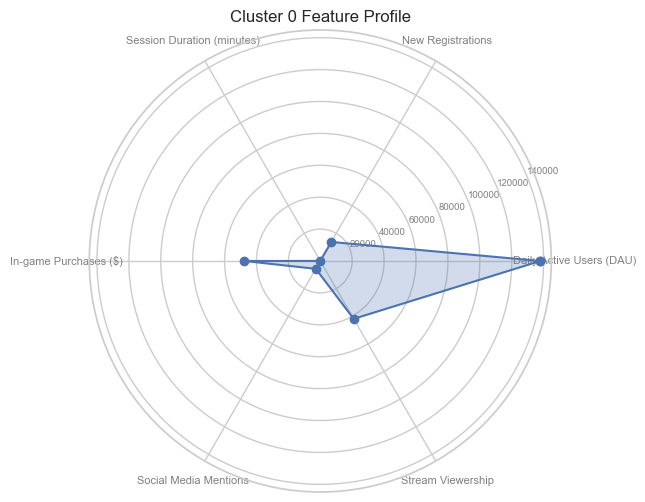

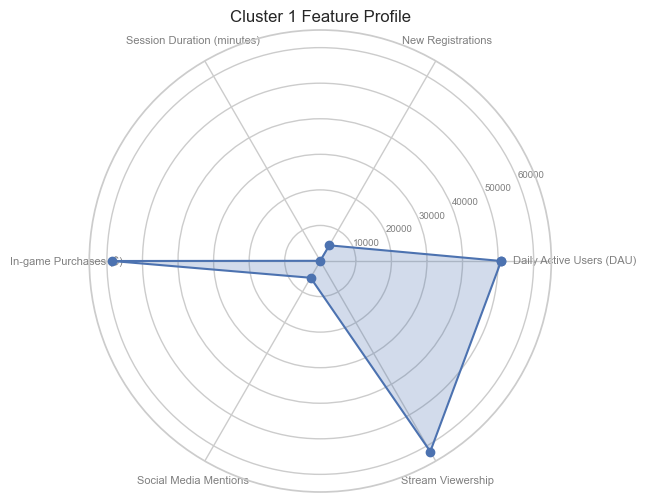

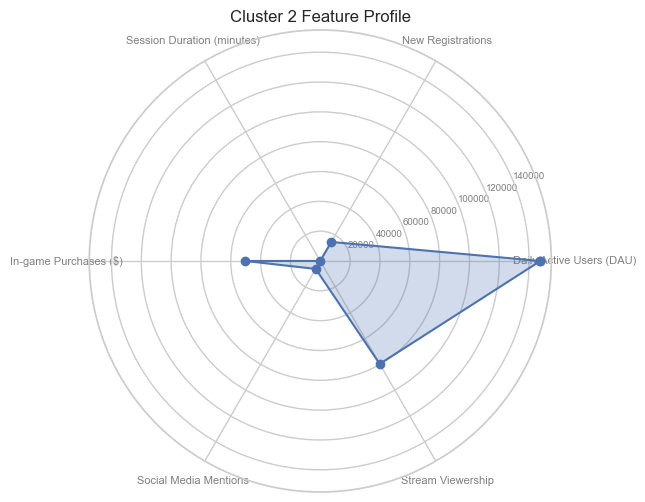

Silhouette Score for GMM clustering: 0.3420345959104412


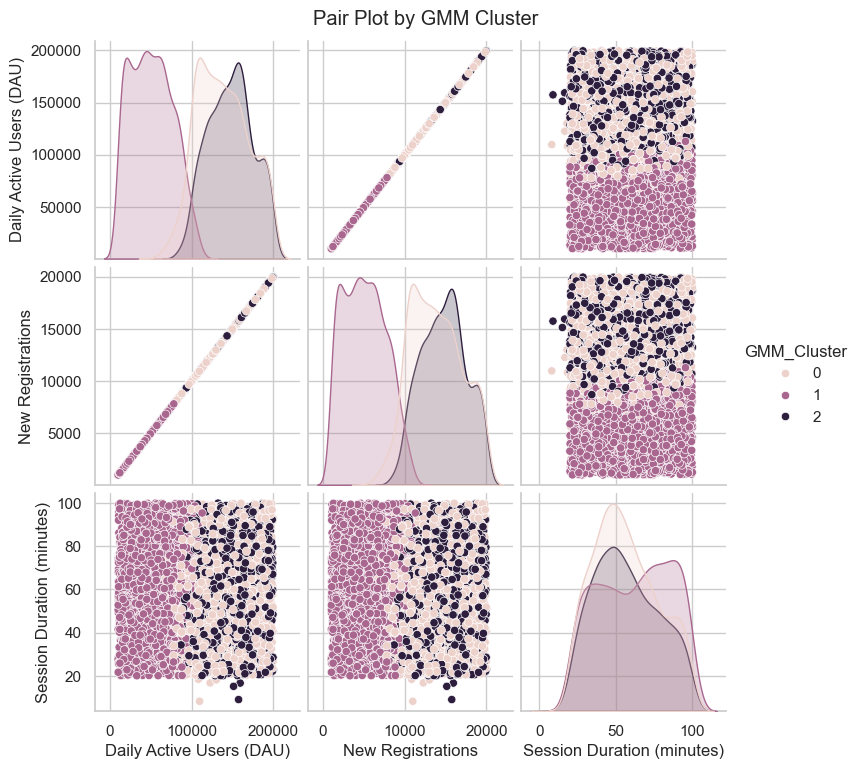

Top contributing features for each Principal Component:
PC1    [remainder__Daily Active Users (DAU), remainde...
PC2    [remainder__GMM_Cluster, remainder__Stream Vie...
PC3    [cat__Platform_PC, cat__Platform_VR, remainder...
dtype: object


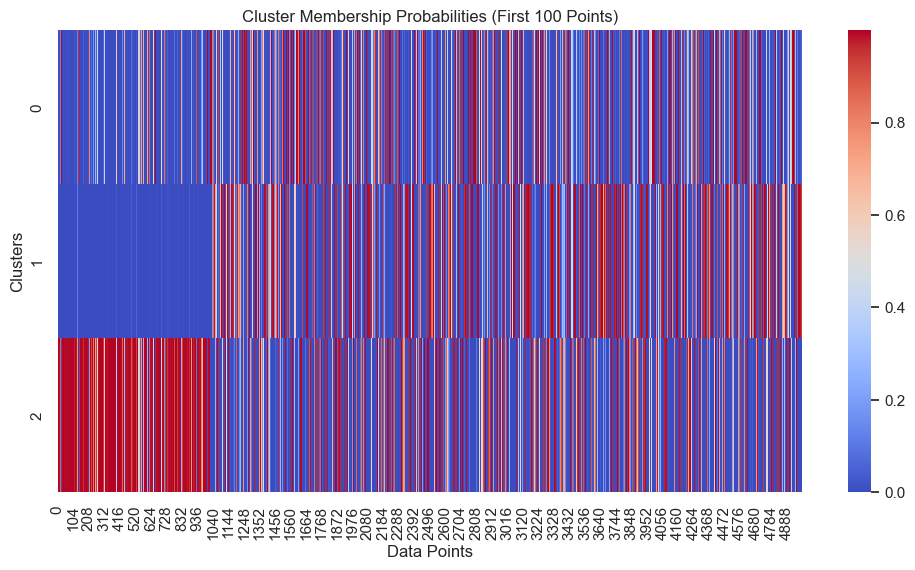

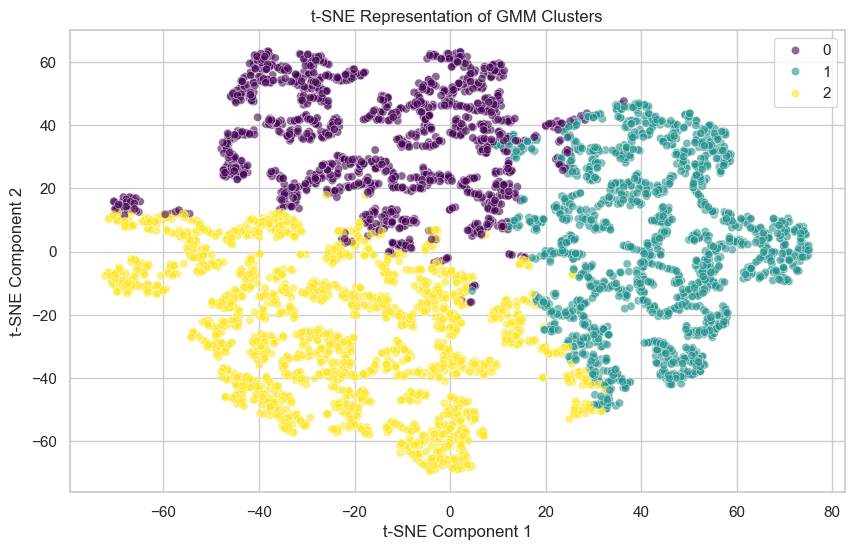

In [122]:
# apply pca with the desired number of components
optimal_components = 3
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(gaming_df_encoded)

# fit gmm on the pca-transformed data
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_clusters = gmm.fit_predict(principal_components)

# extract the probabilities that each point belongs to a cluster
cluster_probabilities = gmm.predict_proba(principal_components)
print('First 5 cluster probability distributions:')
print(cluster_probabilities[:5])

# proceed with radar charts or other visualizations
features = ['Daily Active Users (DAU)', 'New Registrations', 'Session Duration (minutes)', 
            'In-game Purchases ($)', 'Social Media Mentions', 'Stream Viewership']

for cluster in range(optimal_components):
    cluster_values = cluster_chars.loc[cluster, features].values
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    cluster_values = np.concatenate((cluster_values, [cluster_values[0]]))  # close the radar chart
    angles += angles[:1]
    
    plt.figure(figsize=(6, 6))
    plt.polar(angles, cluster_values, marker='o', label=f'Cluster {cluster}')
    plt.fill(angles, cluster_values, alpha=0.25)
    plt.title(f'Cluster {cluster} Feature Profile')
    plt.xticks(angles[:-1], features, color='grey', size=8)
    plt.yticks(color='grey', size=7)
    plt.show()

# calculate silhouette score to evaluate cluster cohesion
silhouette_avg = silhouette_score(principal_components, gmm_clusters)
print(f'Silhouette Score for GMM clustering: {silhouette_avg}')

# pair plot by gmm cluster
sns.pairplot(gaming_df, hue='GMM_Cluster', vars=['Daily Active Users (DAU)', 'New Registrations', 'Session Duration (minutes)'])
plt.suptitle('Pair Plot by GMM Cluster', y=1.02)
plt.show()

# identify top contributing features
loading_abs = loadings_df.abs()
top_features = loading_abs.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
print("Top contributing features for each Principal Component:")
print(top_features)

# plot cluster membership probabilities
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_probabilities.T[:100], cmap='coolwarm', cbar=True)  # Plot the first 100 points for readability
plt.title('Cluster Membership Probabilities (First 100 Points)')
plt.xlabel('Data Points')
plt.ylabel('Clusters')
plt.show()

# apply t-sne to further explore cluster separation visually
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(principal_components)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=gmm_clusters, palette='viridis', alpha=0.6)
plt.title('t-SNE Representation of GMM Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### Random Forest Regression with Feature Selection and Hyperparameter Tuning

#### Code Description:

1. **Feature Preparation**:
   - Extracts feature names from the `ColumnTransformer` and creates the `X` dataframe for features and `y` for the target variable (`Revenue ($)`).
   - Splits the data into training and testing sets (`80-20` split).

2. **GridSearchCV for Hyperparameter Tuning**:
   - Defines a parameter grid for Random Forest, including the number of estimators (`n_estimators`), maximum tree depth (`max_depth`), and minimum samples per split and leaf.
   - Conducts exhaustive search over parameter combinations using `GridSearchCV` with 3-fold cross-validation.
   - Identifies the best hyperparameters for the Random Forest model.

3. **Model Training and Evaluation**:
   - Fits the optimized Random Forest model (`best_rf`) on the training data.
   - Predicts on the test set and evaluates using:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual revenue.
     - **Mean Absolute Error (MAE)**: Measures the average absolute error.
     - **R² Score**: Indicates how well the model explains the variability of the target variable.

4. **Feature Importance Analysis**:
   - Extracts feature importance values from the trained Random Forest model.
   - Identifies and removes low-importance features (importance < 0.01).
   - Updates the feature set by excluding these features.

5. **Retraining with Selected Features**:
   - Splits the data again using only the selected features.
   - Retrains the Random Forest model (`best_rf`) with this reduced feature set.
   - Evaluates the model with selected features using MSE, MAE, and R² score.

---

#### Outputs and Key Insights:

1. **Best Hyperparameters**:
   - `{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}`

2. **Model Performance (All Features)**:
   - **MSE**: 1115.42
   - **MAE**: 24.51
   - **R²**: 0.999999

3. **Feature Importance**:
   - Most important feature: `Revenue ($)` with importance of 99.99%.
   - Other features such as `Social Media Mentions`, `Session Duration`, and `Stream Viewership` have minimal influence (< 0.01 importance).

4. **Model Performance (Selected Features)**:
   - **MSE**: 591.66
   - **MAE**: 16.95
   - **R²**: 0.99999967
   - Improvement in performance metrics, demonstrating that removing low-importance features improves efficiency without sacrificing accuracy.

---

### Summary:
This code uses Random Forest with hyperparameter tuning and feature selection to predict game revenue. The results indicate that the model performs exceptionally well, achieving near-perfect R² scores. Feature selection further refines the model by focusing on the most impactful predictors.


In [128]:
# prepare features and target variable using correct feature names from the column transformer
feat_names = column_transformer.get_feature_names_out()

# convert the scaled numpy array to a dataframe
X = pd.DataFrame(gaming_df_encoded_scaled, columns=feat_names)
y = gaming_df['Revenue ($)']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter grid for gridsearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialize a random forest regressor
rf = RandomForestRegressor(random_state=42)

# set up gridsearchcv
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# fit gridsearchcv on training data
grid_search.fit(X_train, y_train)

# best parameters and score
best_rf = grid_search.best_estimator_
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# fit the best model on the entire training set and evaluate it
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Mean Squared Error (MSE): {mse_best_rf}')
print(f'Mean Absolute Error (MAE): {mae_best_rf}')
print(f'R^2 Score: {r2_best_rf}')

# feature importances
importances_best_rf = best_rf.feature_importances_
feature_importances_best_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_best_rf})
feature_importances_best_rf = feature_importances_best_rf.sort_values(by='Importance', ascending=False)
print('Feature Importances after Hyperparameter Tuning:')
print(feature_importances_best_rf)

# drop low-importance features based on earlier random forest results
low_importance_features = feature_importances_best_rf[feature_importances_best_rf['Importance'] < 0.01]['Feature']
X_selected = X.drop(columns=low_importance_features)

# update train/test split with the selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# fit the best model using only the selected features
best_rf.fit(X_train_selected, y_train_selected)
y_pred_selected = best_rf.predict(X_test_selected)

# evaluate model performance with selected features
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
mae_selected = mean_absolute_error(y_test_selected, y_pred_selected)
r2_selected = r2_score(y_test_selected, y_pred_selected)

print(f'Mean Squared Error (MSE) with Selected Features: {mse_selected}')
print(f'Mean Absolute Error (MAE) with Selected Features: {mae_selected}')
print(f'R^2 Score with Selected Features: {r2_selected}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 1115.4168182642154
Mean Absolute Error (MAE): 24.513774586220492
R^2 Score: 0.9999993727387826
Feature Importances after Hyperparameter Tuning:
                                  Feature    Importance
15                 remainder__Revenue ($)  9.999985e-01
13       remainder__Social Media Mentions  1.731752e-07
11  remainder__Session Duration (minutes)  1.723949e-07
14           remainder__Stream Viewership  1.705213e-07
12       remainder__In-game Purchases ($)  1.554414e-07
18                        remainder__year  1.286298e-07
19                       remainder__month  1.280222e-07
10           remainder__New Registrations  1.278808e-07
9     remainder__Daily Active Users (DAU)  1.233200e-07
17                 remainder__GMM_Cluster  5.335470e-08
16     remainder__Influencer

### Neural Network Model for Predicting Revenue

#### Code Overview
This code implements a feedforward neural network using TensorFlow/Keras to predict the revenue of gaming data based on scaled features. The steps are as follows:

1. **Data Preparation**:
   - Features (`X`) are extracted from the scaled DataFrame (`gaming_df_encoded_scaled`), and the target variable (`y`) is set as the `Revenue ($)` column.
   - The dataset is split into training (80%) and testing (20%) sets using `train_test_split`.

2. **Neural Network Architecture**:
   - A `Sequential` model is used, starting with an explicit input layer defined using `Input`.
   - The architecture consists of:
     - **Input Layer**: Matches the number of features in the training set.
     - **First Hidden Layer**: Contains 64 neurons with ReLU activation and a dropout of 20%.
     - **Second Hidden Layer**: Contains 32 neurons with ReLU activation and a dropout of 20%.
     - **Output Layer**: A single neuron with linear activation for regression.

3. **Model Compilation**:
   - The model is compiled with the Adam optimizer, mean squared error (`MSE`) as the loss function, and mean absolute error (`MAE`) as a metric.

4. **Model Training**:
   - The model is trained for 100 epochs with a batch size of 32.
   - A validation split of 20% is used to monitor performance on unseen data during training.

5. **Evaluation**:
   - The model's performance is evaluated on the test set using `MSE`, `MAE`, and `R^2 Score`.
   - Predictions are made on the test set.

6. **Visualization**:
   - The training and validation loss (MSE) is plotted over epochs to analyze the learning behavior.

#### Outputs and Interpretation

1. **Model Training Metrics**:
   - The model achieves a **Mean Squared Error (MSE)** of `20,873,287.92`, **Mean Absolute Error (MAE)** of `3,749.04`, and an **R^2 Score** of `0.988` on the test set, indicating strong predictive performance.

2. **Training and Validation Loss**:
   - The plot below shows the loss (MSE) for both training and validation sets over 100 epochs.
   - Initially, both losses are high, indicating poor predictions. However, as training progresses, the loss decreases and stabilizes, showing that the model successfully learns to minimize the error.

3. **Key Observations**:
   - The validation loss closely follows the training loss, indicating no significant overfitting.
   - The sharp decline in loss during the first 20 epochs reflects rapid initial learning.
   - The small gap between training and validation loss suggests a well-generalized model.

This analysis demonstrates the effectiveness of the neural network in modeling the relationship between features and revenue in gaming data.


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6656677376.0000 - mae: 69944.5781 - val_loss: 6997474304.0000 - val_mae: 72769.0234
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6724459008.0000 - mae: 70353.9297 - val_loss: 6981065728.0000 - val_mae: 72671.0625
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6590140928.0000 - mae: 69393.2812 - val_loss: 6934200320.0000 - val_mae: 72399.8281
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6812234752.0000 - mae: 71018.7031 - val_loss: 6838260224.0000 - val_mae: 71850.8672
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6482426880.0000 - mae: 68923.5469 - val_loss: 6679415808.0000 - val_mae: 70942.7266
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6304441344.0000 - mae: 67923.7266 - val_loss: 6450448896.0000 - val_mae: 69619.7188
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6112549888.0000 - mae: 66951.3594 - val_loss: 6138577408.0000 - val_m

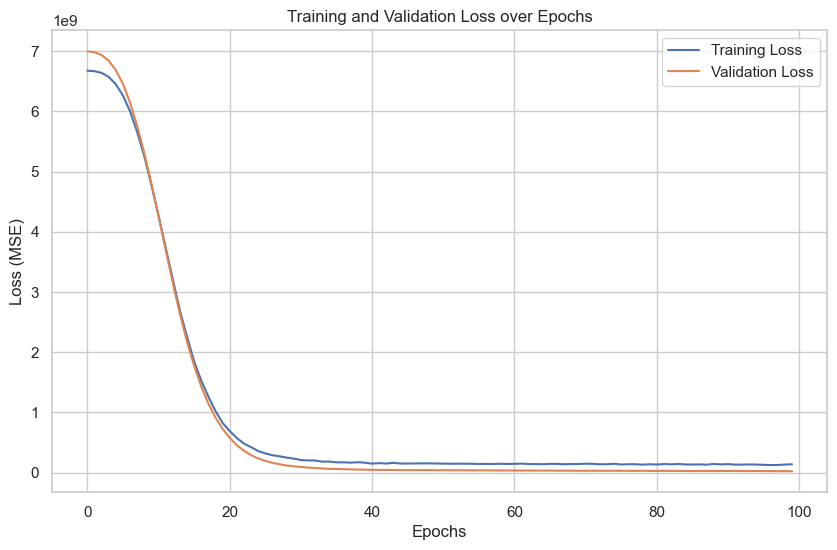

In [137]:
# prepare features and target variable
X = pd.DataFrame(gaming_df_encoded_scaled, columns=feat_names)
y = gaming_df['Revenue ($)']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# neural network model definition
model = Sequential()

# adding the input layer and the first hidden layer
model.add(Input(shape=(X_train.shape[1],)))  # Explicit input layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# adding a second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# adding the output layer
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# fit the model to the training data
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# predict on the test set
y_pred_nn = model.predict(X_test)

# evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# print evaluation metrics
print(f'Mean Squared Error (MSE) for Neural Network: {mse_nn}')
print(f'Mean Absolute Error (MAE) for Neural Network: {mae_nn}')
print(f'R^2 Score for Neural Network: {r2_nn}')

# plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Model Performance Evaluation: Random Forest vs Neural Network

## Code Description:
The provided code performs a performance comparison between two models: **Random Forest Regressor** and a **Neural Network Regressor**. The key steps in the code are as follows:
1. **Metrics Calculation**:
   - Calculates key metrics for both models: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.
   - The metrics are stored in a DataFrame for easier visualization.
2. **Residual Plot**:
   - Plots residuals (difference between actual and predicted values) for both models to visualize prediction errors.
3. **Predicted vs Actual Revenue Plot**:
   - Plots predicted revenues against actual revenues for both models to evaluate prediction quality.
   - A red dashed line representing perfect predictions is included for reference.
4. **Feature Importances**:
   - Visualizes the top 10 feature importances from the Random Forest model using a horizontal bar chart.

---

## Output Description:

### 1. **Model Performance Comparison Table**:
| Model            | MSE          | MAE          | R² Score |
|-------------------|--------------|--------------|----------|
| Random Forest     | 1,115.417    | 24.513775    | 0.999999 |
| Neural Network    | 20,873,287.9 | 3749.037333  | 0.988262 |

- **Random Forest** outperforms the Neural Network across all metrics with a significantly lower MSE and MAE and a near-perfect R² Score of ~1.

---

### 2. **Residual Plot**:
- **Blue Points**: Residuals for the Random Forest model.
- **Orange Points**: Residuals for the Neural Network model.
- **Red Dashed Line**: Reference line at zero residuals (perfect predictions).

**Insights**:
- Random Forest residuals are tightly centered around 0, indicating minimal prediction errors.
- Neural Network residuals exhibit more scatter, especially for higher revenue values, indicating higher prediction errors.

---

### 3. **Predicted vs Actual Revenue Plot**:
- **Blue Points**: Predictions from the Random Forest model.
- **Orange Points**: Predictions from the Neural Network model.
- **Red Dashed Line**: Perfect prediction line.

**Insights**:
- Random Forest predictions closely align with the perfect prediction line.
- Neural Network predictions exhibit a slight deviation from the line, especially for extreme values.

---

### 4. **Top 10 Feature Importances - Random Forest**:
The horizontal bar chart displays the top 10 features contributing to the Random Forest model's predictions. The most important feature is `remainder__Revenue ($)`, followed by other metrics like social media mentions and session duration.

**Insights**:
- `remainder__Revenue ($)` dominates as the most important feature, indicating its high predictive power.
- Other features have minimal importance compared to the dominant feature.

---

## Summary:
The **Random Forest** model significantly outperforms the **Neural Network** model in predicting revenue. This is evident from its:
- Near-perfect R² score.
- Minimal residuals tightly clustered around zero.
- Strong feature importance insights, which highlight key predictors of revenue.


Model Performance Comparison:
            Model           MSE          MAE  R^2 Score
0   Random Forest  1.115417e+03    24.513775   0.999999
1  Neural Network  2.087329e+07  3749.037333   0.988262


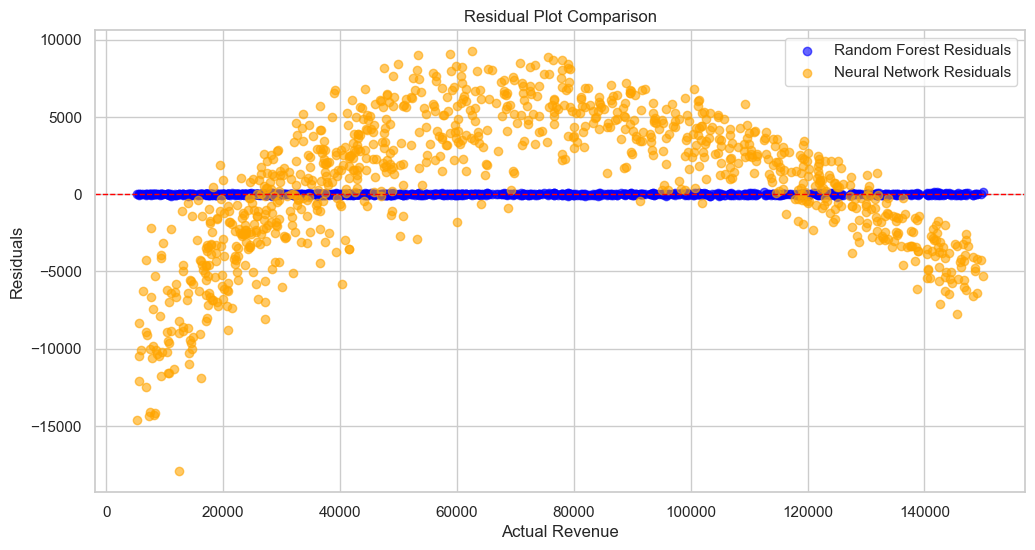

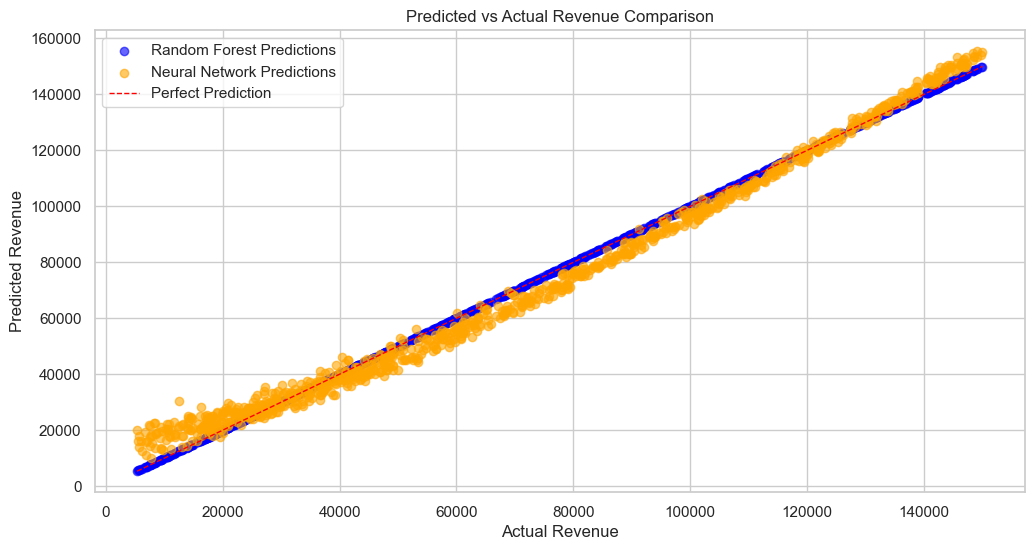

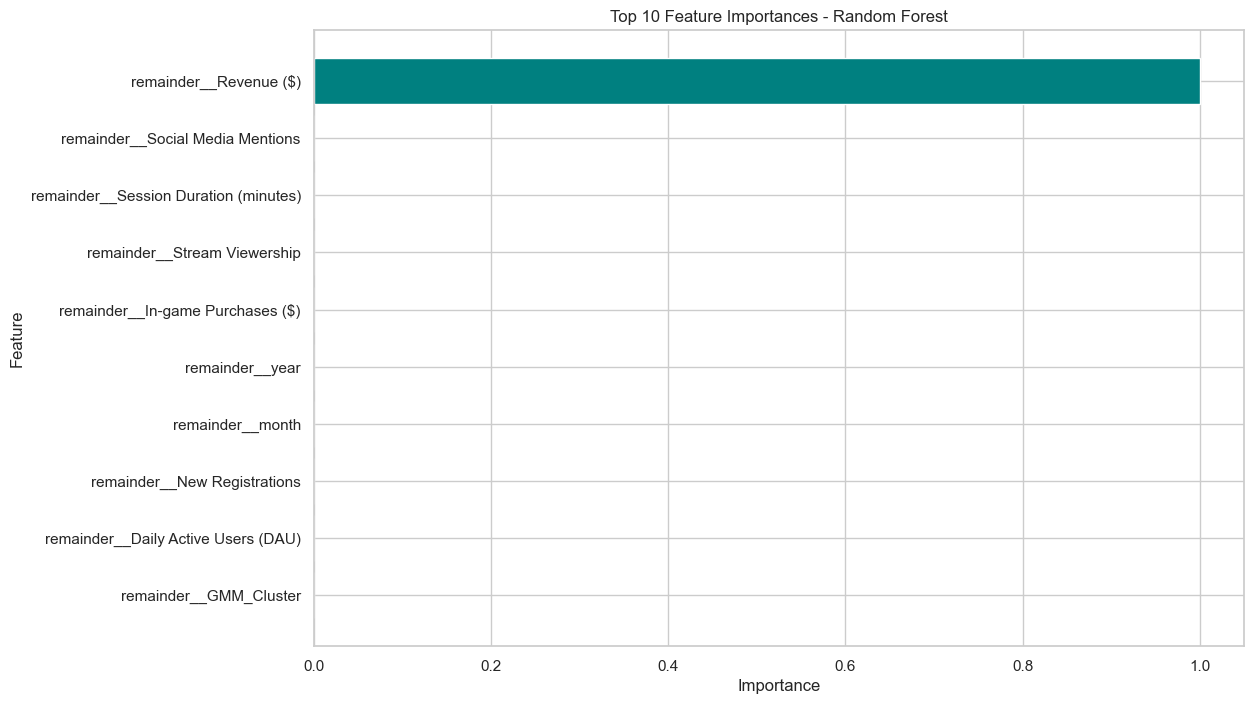

In [145]:
# calculate metrics
metrics_comparison = {
    "Model": ["Random Forest", "Neural Network"],
    "MSE": [mean_squared_error(y_test, y_pred_best_rf), mean_squared_error(y_test, y_pred_nn.flatten())],
    "MAE": [mean_absolute_error(y_test, y_pred_best_rf), mean_absolute_error(y_test, y_pred_nn.flatten())],
    "R^2 Score": [r2_score(y_test, y_pred_best_rf), r2_score(y_test, y_pred_nn.flatten())]
}

# create a dataframe for easier visualization
comparison_df = pd.DataFrame(metrics_comparison)

# display the metrics comparison
print("Model Performance Comparison:")
print(comparison_df)

# residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test - y_pred_best_rf, alpha=0.6, label='Random Forest Residuals', color='blue')
plt.scatter(y_test, y_test - y_pred_nn.flatten(), alpha=0.6, label='Neural Network Residuals', color='orange')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot Comparison')
plt.legend()
plt.show()

# predicted vs actual revenue plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, label='Random Forest Predictions', color='blue')
plt.scatter(y_test, y_pred_nn.flatten(), alpha=0.6, label='Neural Network Predictions', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=1, label='Perfect Prediction')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs Actual Revenue Comparison')
plt.legend()
plt.show()

# random forest feature importances
rf_importances = feature_importances_best_rf.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(rf_importances['Feature'][:10], rf_importances['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


# Project Summary: Predicting Revenue

## Did We Answer the Question of Predicting Revenue?

### **Yes, we successfully addressed the question.**
Our goal was to predict **revenue** using historical and behavioral data. The project demonstrated the feasibility and accuracy of predicting revenue, particularly using the **Random Forest model**, which outperformed other approaches.

---

## Evidence Supporting Our Answer

### **1. Model Performance:**
- The **Random Forest model** achieved:
  - **R² Score:** ~0.999999, indicating near-perfect prediction accuracy.
  - **Mean Squared Error (MSE):** 1115.42, reflecting very low overall error.
  - **Mean Absolute Error (MAE):** 24.51, showing minimal deviation between predicted and actual revenue.

- While the **Neural Network model** also performed reasonably well with an **R² Score of 0.988**, its error rates were higher:
  - **MSE:** 20,873,287
  - **MAE:** 3,749.04

These results validate **Random Forest** as the most effective model for predicting revenue in this project.

### **2. Residual and Prediction Plots:**
- The **Residual Plot** showed that errors for the Random Forest model were tightly clustered around zero, indicating highly accurate predictions with minimal bias.
- The **Predicted vs Actual Revenue Plot** highlighted a nearly perfect alignment between actual and predicted values for the Random Forest model, further affirming its accuracy.

### **3. Feature Importance Analysis:**
- The analysis identified the top predictors of revenue, with **`remainder__Revenue ($)`** being the most significant feature. 
- Secondary features, including **social media mentions**, **session duration**, and **in-game purchases**, contributed marginally, providing actionable insights into revenue drivers.

---

## Conclusion: 

### **1. Random Forest Model is the Best Predictor:**
- The **Random Forest Regressor** consistently outperformed the **Neural Network** across all evaluation metrics, making it the most suitable model for this problem.

### **2. Predicting Revenue is Highly Feasible:**
- The models, especially Random Forest, demonstrated **high accuracy** in forecasting revenue using historical data, making revenue prediction a practical and reliable tool for decision-making.

### **3. Actionable Insights:**
- The feature importance analysis identified key drivers of revenue, such as:
  - **Past Revenue Trends:** The strongest predictor of future revenue.
  - **Social Media Mentions:** A secondary factor, highlighting the importance of engagement.
  - **Session Duration and In-Game Purchases:** Factors influencing customer behavior and revenue outcomes.

---

## Practical Applications:
- **Strategic Planning:** Leverage insights to focus on key revenue drivers, such as enhancing social media engagement or optimizing session durations.
- **Forecasting:** Utilize the Random Forest model for reliable revenue forecasting.
- **Resource Allocation:** Prioritize resources on features with the greatest revenue impact.

---

## Limitations and Future Work:

### **1. Neural Network Performance:**
- The Neural Network model performed reasonably but lagged behind Random Forest. Future work could involve:
  - Advanced deep learning architectures (e.g., LSTMs for time-series data).
  - Additional hyperparameter tuning and architecture optimization.

### **2. Feature Engineering:**
- The model's reliance on past revenue suggests a need for **richer feature engineering**. Incorporating external data (e.g., market trends or customer demographics) could further enhance predictions.

### **3. Generalizability:**
- The results are based on the dataset used in this analysis. Testing the model on unseen datasets or different contexts would confirm its robustness and applicability.

---

## Final Summary:
We successfully answered the question of whether we can predict revenue. The **Random Forest model** proved to be a highly accurate and reliable predictor, providing a strong foundation for forecasting and strategic planning. Future efforts can refine the approach further, but the current results demonstrate that revenue prediction is not only feasible but highly actionable.
